running on cpu
running on cpu
Loading FFC image
r03c03 106 2023-02-13 16:29:23.955567
f01 r03c03 106 2023-02-13 16:29:23.955657


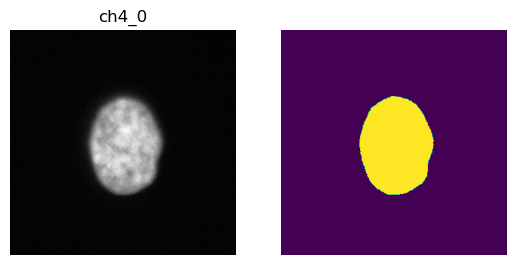

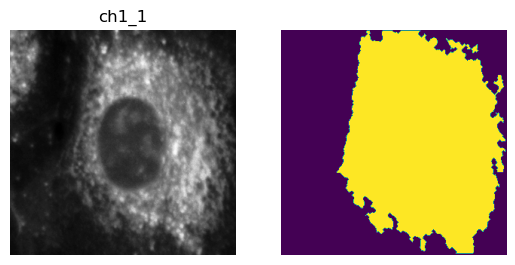

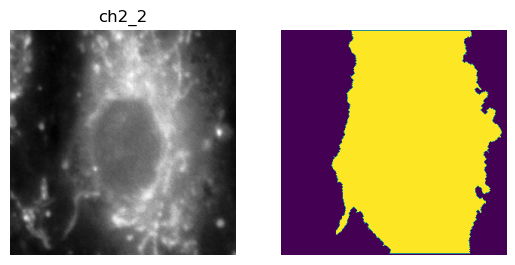

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


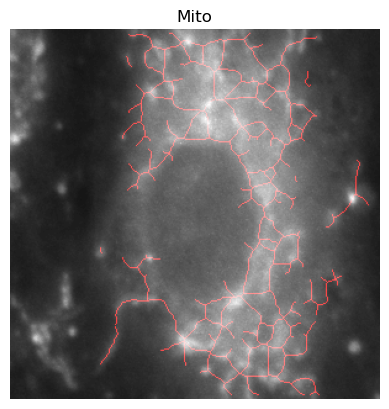

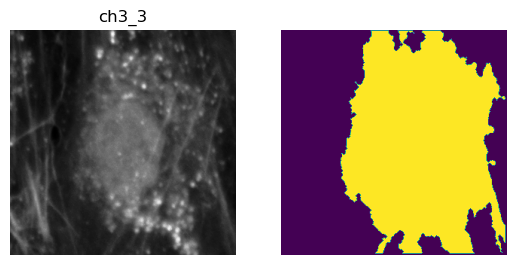

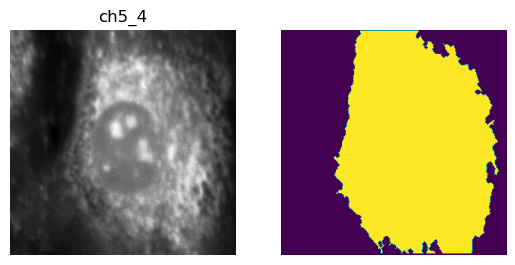

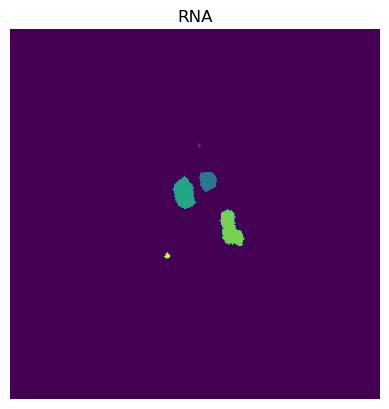

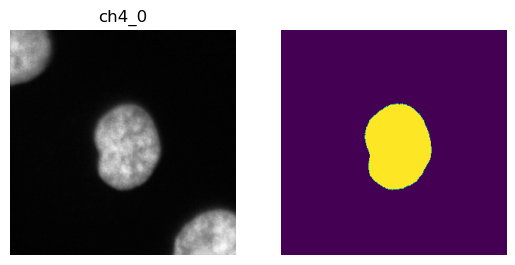

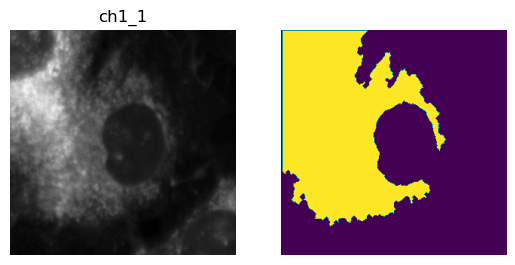

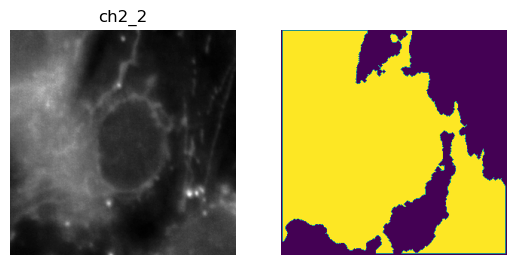

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


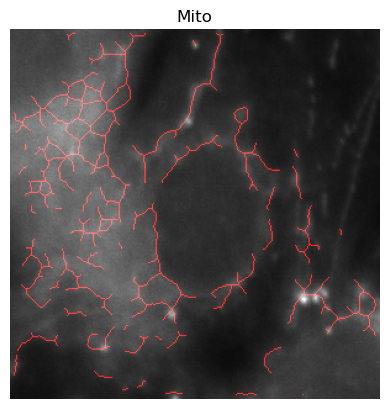

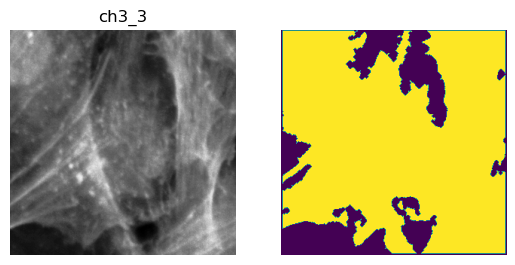

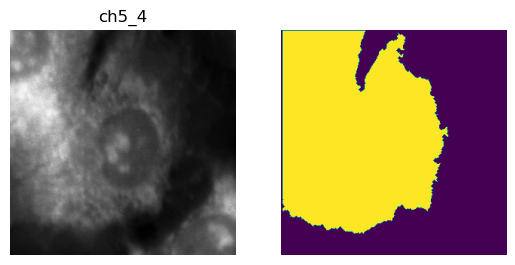

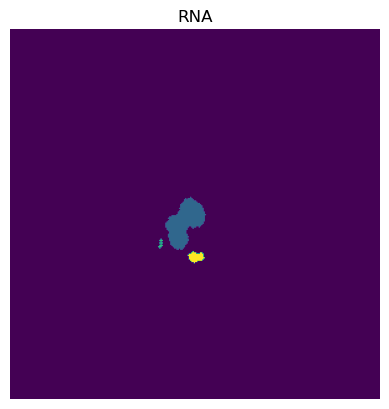

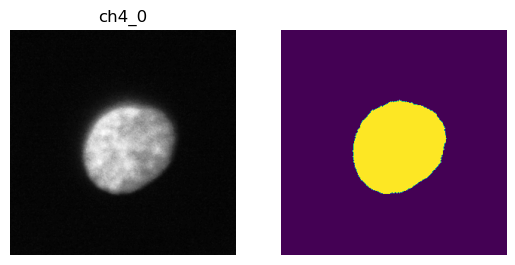

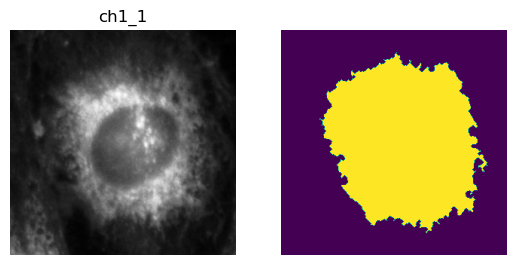

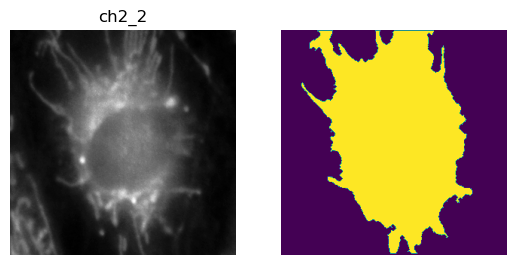

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


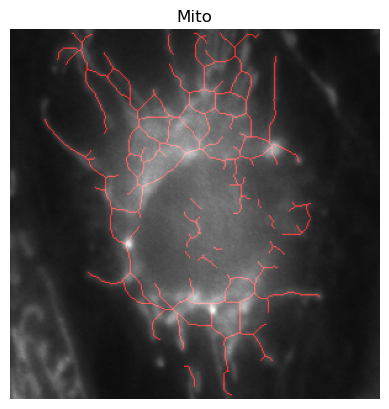

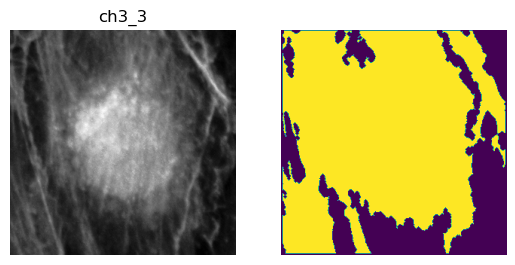

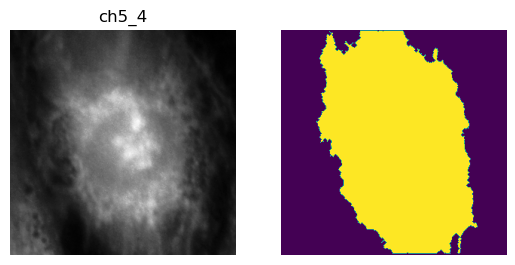

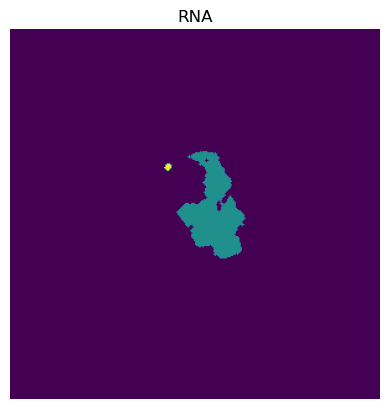

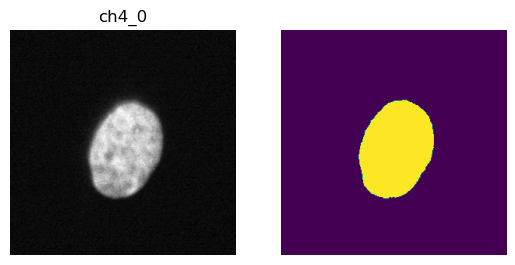

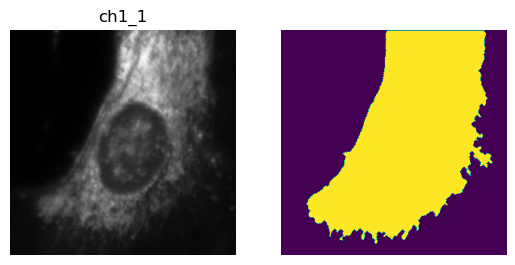

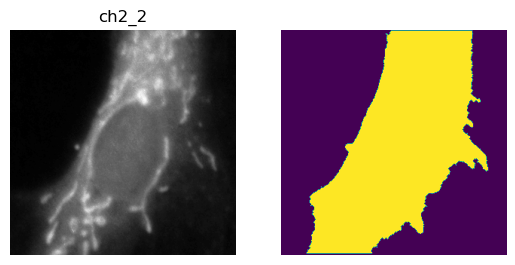

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


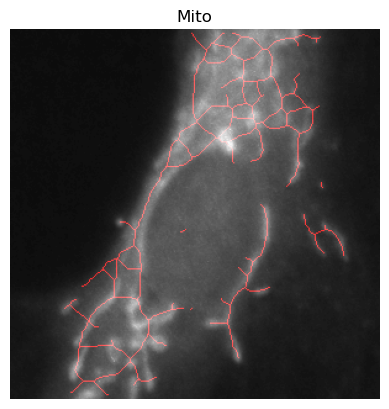

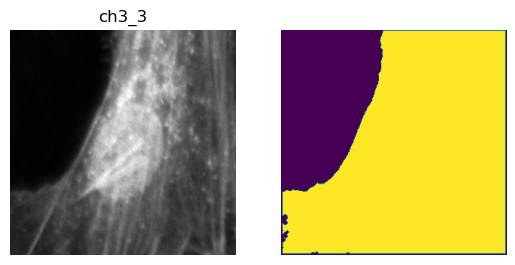

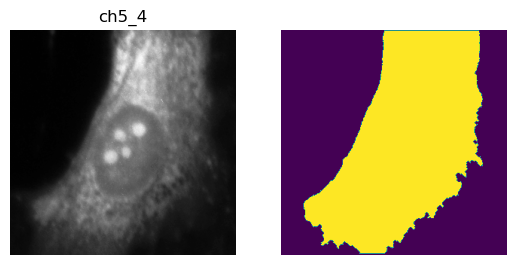

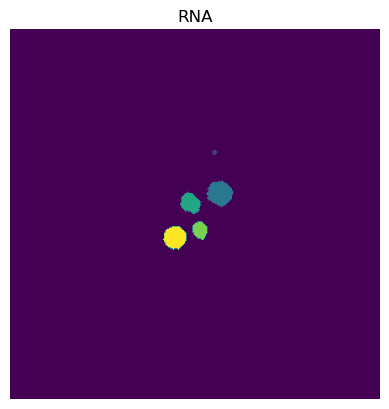

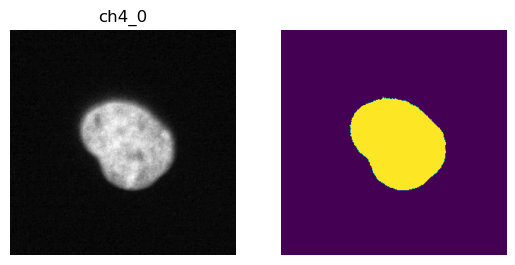

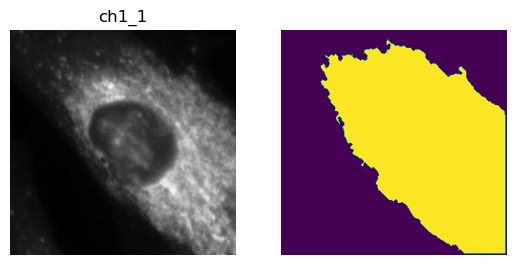

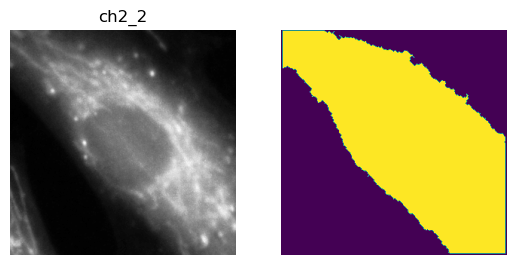

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


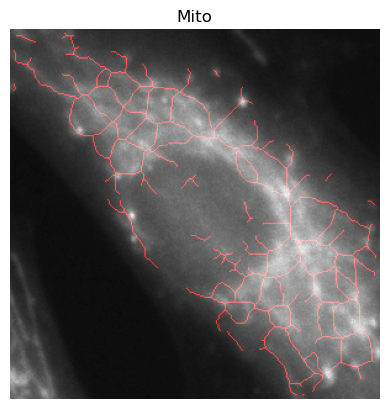

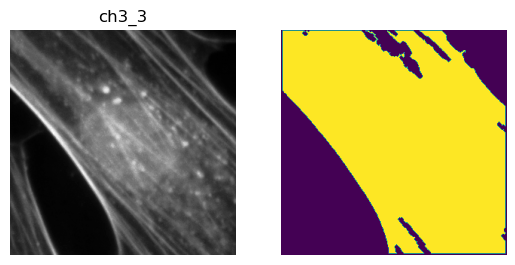

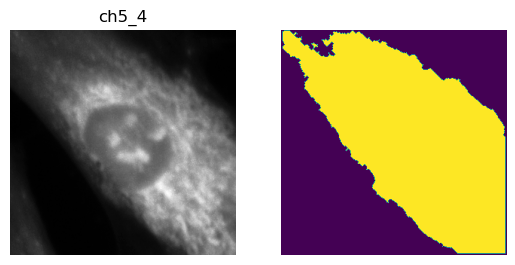

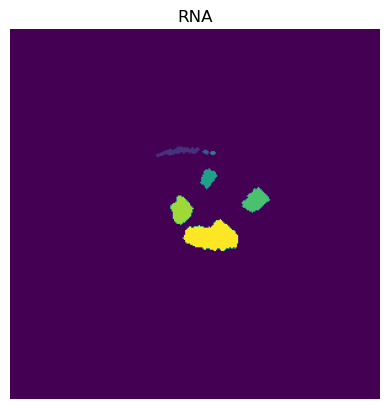

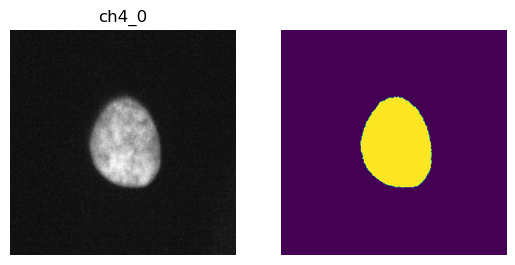

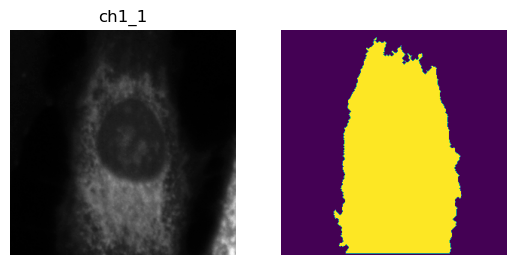

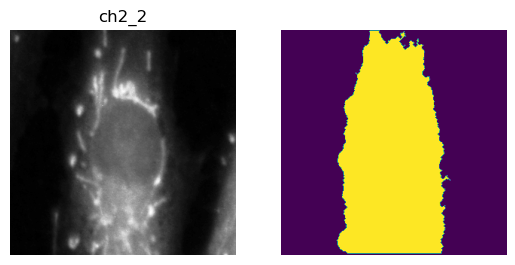

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


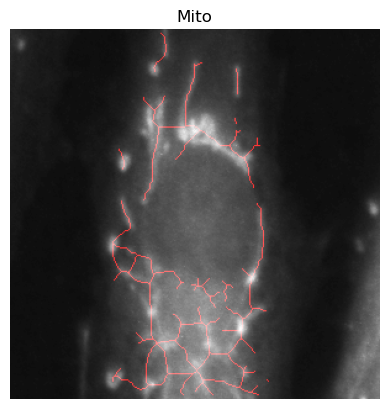

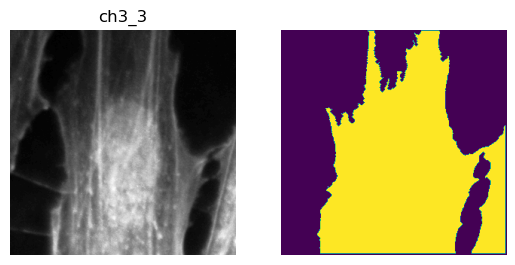

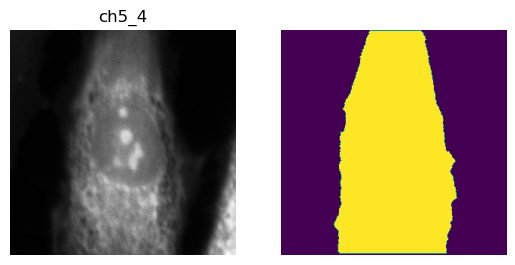

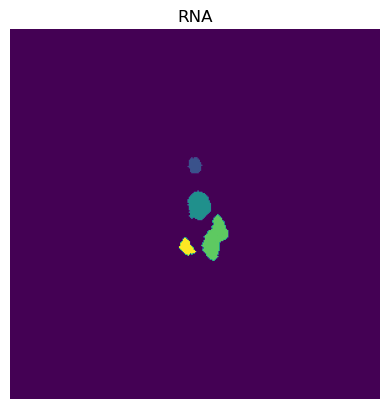

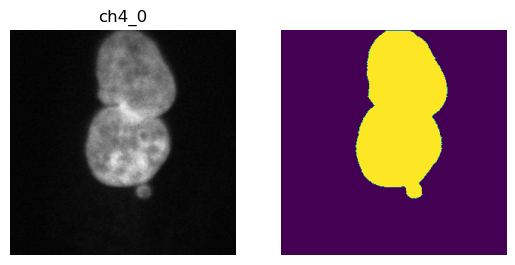

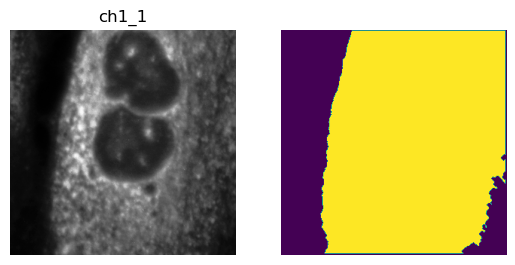

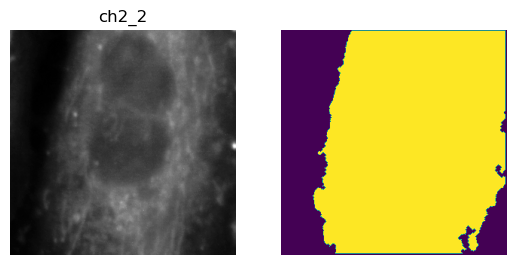

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


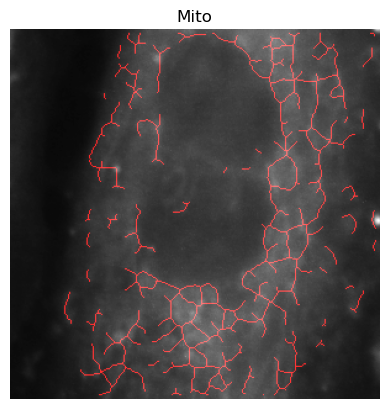

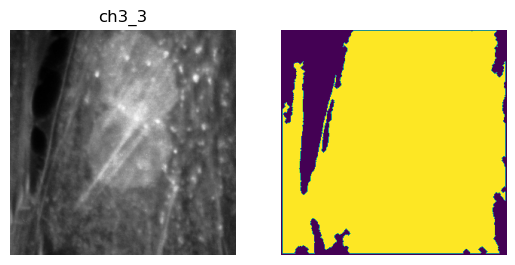

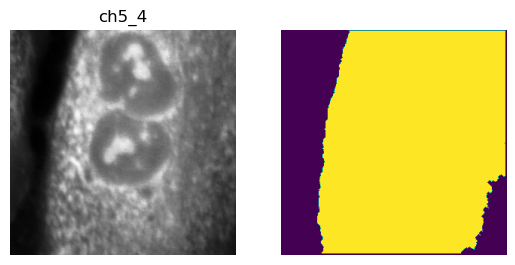

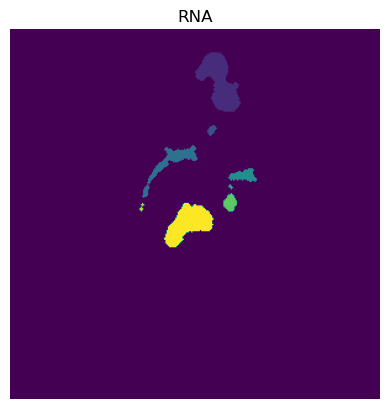

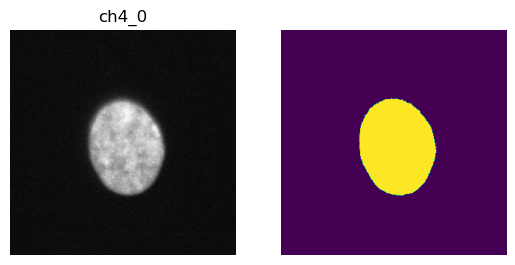

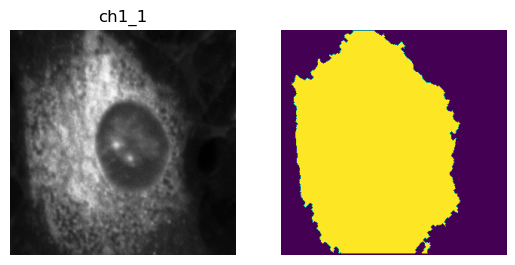

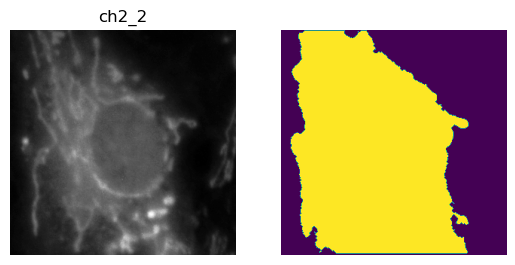

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


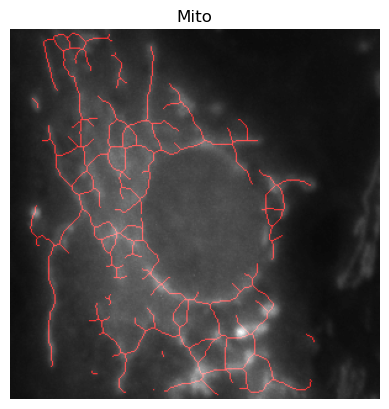

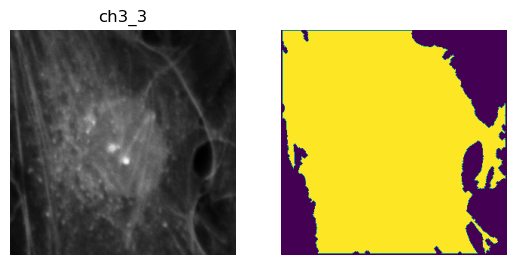

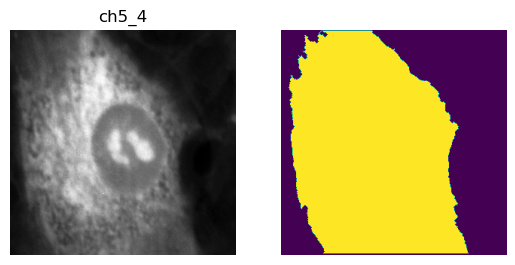

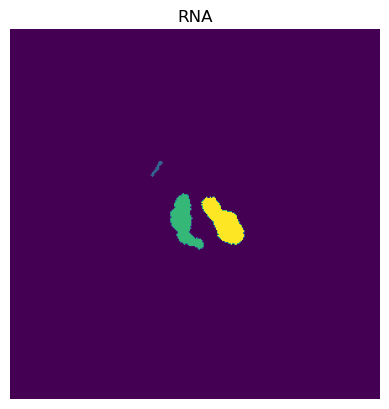

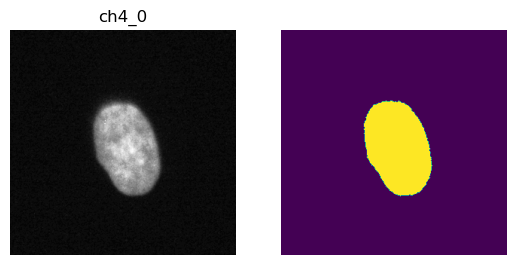

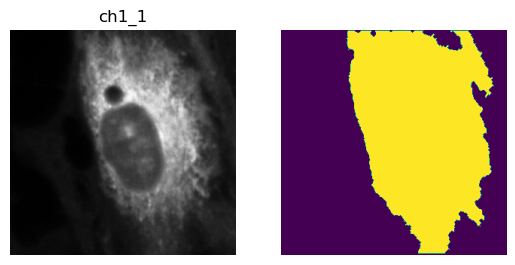

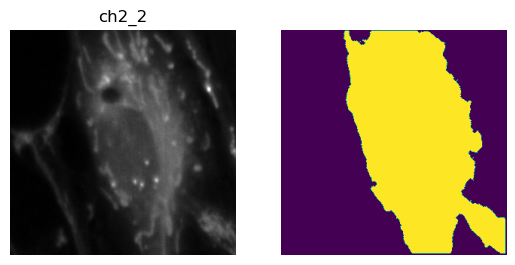

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


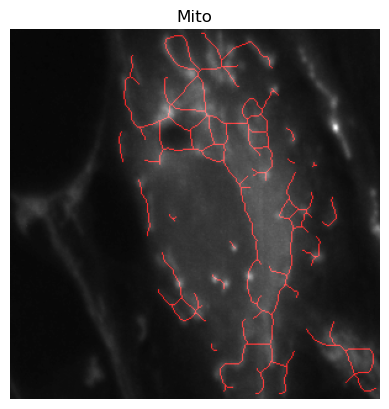

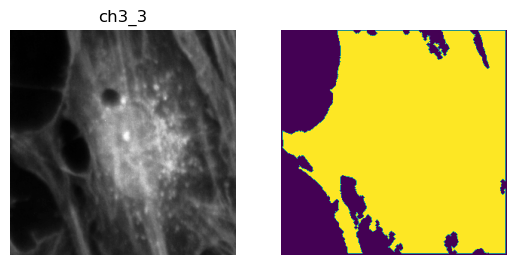

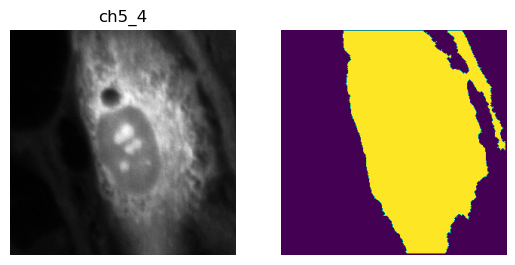

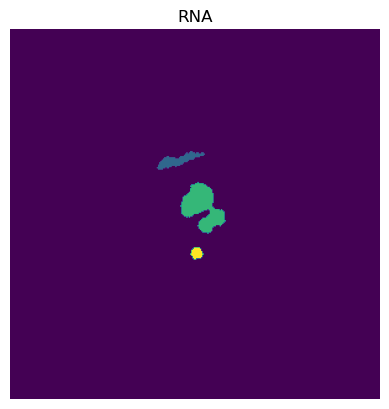

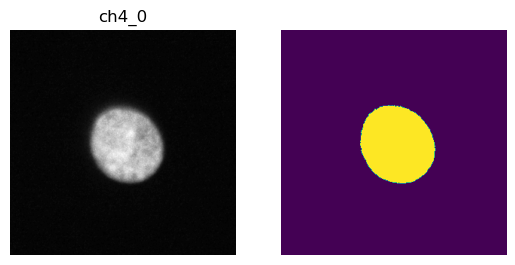

KeyboardInterrupt: 

In [1]:
import Screens_Vector_Local
import numpy as np
#Screens_Emb_Local.Embedding_screens('/media/bianca/Disk3/HTS0012',experiment_name='HTS0012',Plates=np.arange(107,113).astype(str))
#Screens_Vector_Local_NewFeatures12072022.Vector_screens('/media/bianca/Disk21/HTS0026',saving_folder='/home/bianca/Documents/HCI_Projects/Drug_Shifts/Vectors/Refactored/',experiment_name='HTS0026',
                                   # Plates=['102'],parallel=False,downsampling=2)#,SaveImage='/media/bianca/Disk21/HTS0026/HTS0026_Crops/')

crop=Screens_Vector_Local.Vector_screens('/media/bianca/Disk2/HTS0026',saving_folder='//home/bianca/Documents/Python_jnb/Vector_paper2023/',experiment_name='HTS0026',
                                    Plates=['106'],ROI=150,parallel=False,downsampling=1,visualization=True,use_cpu=True)


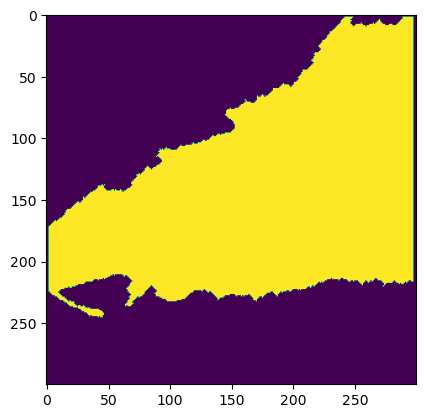

In [ ]:
import skimage
import matplotlib.pyplot as plt

from scipy import ndimage as ndi

Am = crop.crop[:,:,2] > skimage.filters.threshold_multiotsu(crop.crop[:,:,2])[0]*0.9 #* 0.78

Am = ndi.binary_closing(Am, structure=skimage.morphology.disk(2))
Am = ndi.binary_fill_holes(Am)

Lab = skimage.measure.label(Am)

# invMask=Lab<1
Lab=Lab==2
plt.imshow(Lab)

In [ ]:
import skimage
#Mseg = skimage.exposure.equalize_hist(crop.crop[:,:,2]*Lab)
Mseg = (crop.crop[:,:,2]*Lab)
#define the vertical filter
vertical_filter = [[-1,-10,-1], [0,0,0], [1,10,1]]

#define the horizontal filter
horizontal_filter = [[-1,0,1], [-10,0,10], [-1,0,1]]
edges_img = Mseg.copy()
for row in range(3, 300-2):
    for col in range(3, 300-2):
        
        #create little local 3x3 box
        local_pixels = Mseg[row-1:row+2, col-1:col+2]
        
        #apply the vertical filter
        vertical_transformed_pixels = vertical_filter*local_pixels
        #remap the vertical score
        vertical_score = vertical_transformed_pixels.sum()/4
        
        #apply the horizontal filter
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        #remap the horizontal score
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        #combine the horizontal and vertical scores into a total edge score
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        
        #insert this edge score into the edges image
        edges_img[row, col] = edge_score

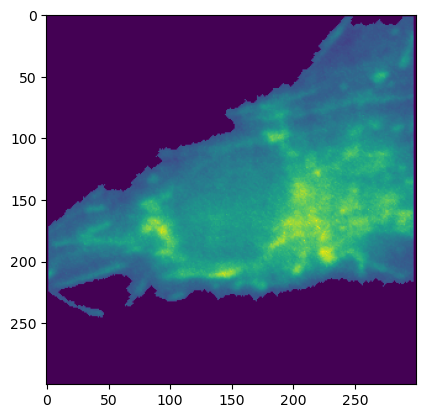

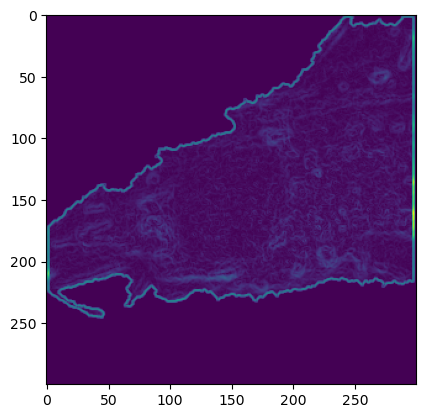

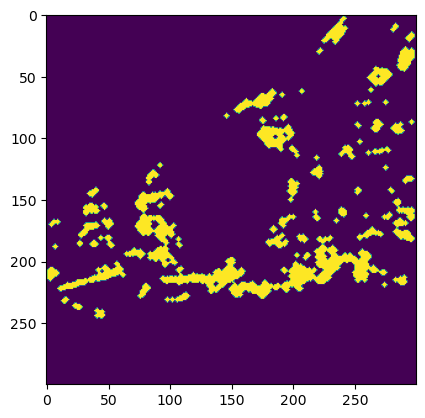

In [ ]:
import matplotlib.pyplot as plt

edges_img=skimage.filters.sobel(Mseg)
plt.imshow(Mseg)
plt.show()
plt.imshow(edges_img)
plt.show()
edges_img1=edges_img > np.quantile(skimage.filters.threshold_multiotsu(edges_img),0)
edges_img1 = skimage.measure.label(edges_img1)>0
edges_img1=ndi.binary_opening(edges_img1,structure=skimage.morphology.disk(1),iterations=2)
edges_img1=ndi.binary_closing(edges_img1,structure=skimage.morphology.disk(1),iterations=1)
plt.imshow(edges_img1)


In [ ]:

plt.imshow(skimage.morphology.binary_erosion(Mseg))



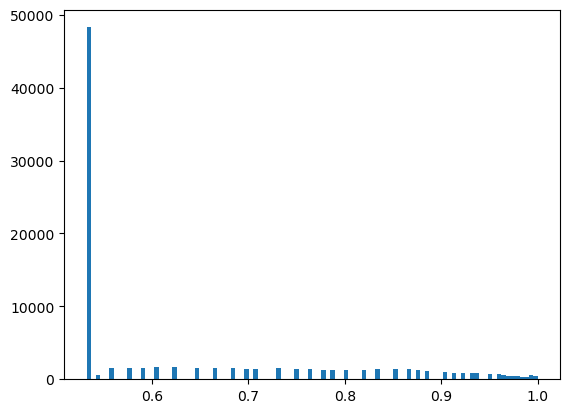

In [ ]:
_=plt.hist(Mseg.ravel(),bins=100)